# Лабораторная работа

## Описание задания

Требуется обучить модель, которая сможет предсказать популярность объявления - исходя из этих предсказаний аналитики риэлторской компании будут редактировать описания объявлений, выставляемых на этой платформе.

## Из чего состоит задание?

Всего в лабораторной работе 5 частей:

- EDA - необходимо исследовать данные в предлагаемом Вам датасете. К исследованию данных относится анализ распределения значений в признаках, проверка скоррелированности признаков и т.д.
- Feature engineering - необходимо заполнить пропуски в данных, обработать категориальные признаки и т.д.
- Выбор целевой метрики - необходимо выбрать метрику качества, которую вы будете оптимизировать. Для выбранной метрики необходимо написать пояснение. В этом задании нет единственного правильного ответа, однако за откровенно неадекватный выбор или слабую аргументацию будут снижаться баллы.
- Проведение экспериментов - необходимо попробовать разные модели, изученные в рамках курса и оптимизировать ими выбранную вами целевую метрику. Решение, состоящее только из grid-search по гиперпараметрам Catboost, получает 0 баллов.
- Анализ ошибок модели - необходимо взять несколько примеров из тестовой части датасета, на которых модель дала неправильный ответ, и попытаться проанализировать их, найти закономерности, полученные выводы проверить на других примерах.

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('/Users/anastasiamyskina/Downloads/houses_ads_popularity.csv')

In [3]:
X.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


- bathrooms: количество ванных
- bedrooms: количество спален
- building_id: ID здания
- created: дата создания объявления
- display_address: адрес 
- features: список разных полезных текстовых тегов
- latitude: ширина (координата)
- longitude: долгода (координата)
- listing_id: ID объявления
- manager_id: ID риелтора
- photos: количество фотографий у объявления
- price: цена в долларах
- TARGET: целевая переменная; "low", "medium" или "high"

In [5]:
X.corr()

,Id,bathrooms,bedrooms,latitude,listing_id,longitude,price
Id,1.000000,0.000189,-0.013098,-0.000766,-0.852544,-0.000491,-0.006833
bathrooms,0.000189,1.000000,0.534950,-0.018788,-0.001310,0.020179,0.056067
bedrooms,-0.013098,0.534950,1.000000,-0.007711,0.008440,0.009308,0.043682
latitude,-0.000766,-0.018788,-0.007711,1.000000,0.002951,-0.993271,-0.001086
listing_id,-0.852544,-0.001310,0.008440,0.002951,1.000000,-0.001311,0.009508
longitude,-0.000491,0.020179,0.009308,-0.993271,-0.001311,1.000000,0.000380
price,-0.006833,0.056067,0.043682,-0.001086,0.009508,0.000380,1.000000


In [6]:
X.isna().sum()

Id                    0
bathrooms             0
bedrooms              0
building_id           0
created               0
description        1037
display_address      88
features              0
latitude              0
listing_id            0
longitude             0
manager_id            0
photos                0
price                 0
street_address        4
TARGET                0
dtype: int64

In [7]:
def info_signs(col):
    print(f'Тип: {X[col].dtype}')
    print(f'Уникальных значений: {X[col].nunique()}')
    print(f'Пропущенных значений: {X[col].isna().sum()}')
    print(f'Процент пропущенных значений:{X[col].isna().sum()/len(X[col])*100:.2f}%')
    X[col].hist()
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.title(f'Распределение {col}');
    plt.show

In [8]:
def info_signs_nohist(col):
    print(f'Тип: {X[col].dtype}')
    print(f'Уникальных значений: {X[col].nunique()}')
    print(f'Пропущенных значений: {X[col].isna().sum()}')
    print(f'Процент пропущенных значений:{X[col].isna().sum()/len(X[col])*100:.2f}%')

### bathrooms

Тип: float64
Уникальных значений: 12
Пропущенных значений: 0
Процент пропущенных значений:0.00%


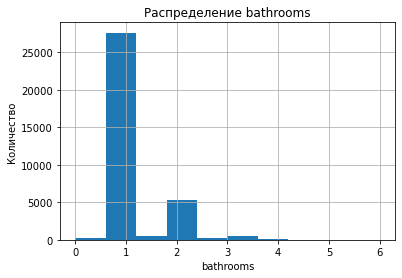

In [9]:
info_signs('bathrooms')

### bedrooms

Тип: int64
Уникальных значений: 8
Пропущенных значений: 0
Процент пропущенных значений:0.00%


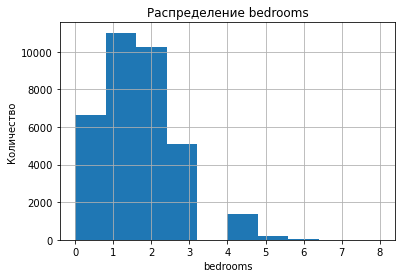

In [10]:
info_signs('bedrooms')

### building_id

In [11]:
info_signs_nohist('building_id')

Тип: object
Уникальных значений: 6378
Пропущенных значений: 0
Процент пропущенных значений:0.00%


In [12]:
X['building_id'].value_counts()

0                                   5713
96274288c84ddd7d5c5d8e425ee75027     196
80a120d6bc3aba97f40fee8c2204524b     161
11e1dec9d14b1a9e528386a2504b3afc     151
bb8658a3e432fb62a440615333376345     141
                                    ... 
b056b885ccb66bec620f32e9ffd7525d       1
08bb0c3596ec343c7bd738450d992363       1
53bbc5ba84e361e6f1304bf4bca48b94       1
baf1dbda2b23cad649d7f3f6a5138fd7       1
d969e94536dc8385c62b3ab120382ca2       1
Name: building_id, Length: 6378, dtype: int64

Очень много пропущенных значений, где параметр равен нулю. Уникальных значений также много.

### created

In [13]:
info_signs_nohist('created')

Тип: object
Уникальных значений: 34186
Пропущенных значений: 0
Процент пропущенных значений:0.00%


In [14]:
X['created'] = pd.to_datetime(X['created'])

Добавим признаки:

- month_year_cnt - Как часто в этот год и этот месяц появлились объявления
- week_year_cnt - Как часто в этот год и эту неделю появлялись объявления
- month - Месяц
- day_of_week - День недели
- hour - Час

In [15]:
month_year = (X.created.dt.month + X.created.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
X["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (X.created.dt.weekofyear + X.created.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
X["week_year_cnt"] = week_year.map(week_year_cnt_map)

X["month"] = X.created.dt.month
X["day_of_week"] = X.created.dt.dayofweek
X["hour"] = X.created.dt.hour
X["weekday"] = X.created.dt.weekday

/var/folders/0z/xdp9mm8x4_z_0_m6kj7_k9hw0000gn/T/ipykernel_75453/3391770163.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (X.created.dt.weekofyear + X.created.dt.year * 100)


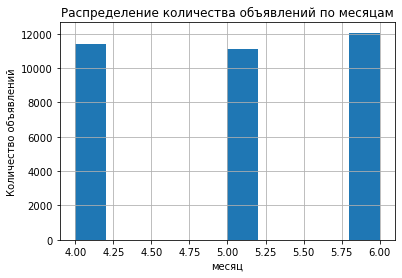

In [16]:
X["month"].hist()
plt.xlabel('месяц')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений по месяцам');
plt.show()

В июне чуть больше объявлений, но не критично.

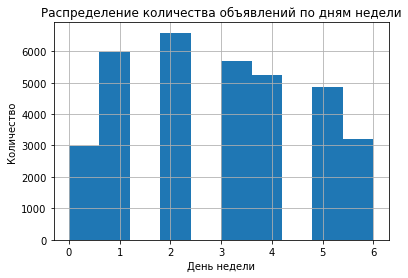

In [17]:
X["weekday"].hist()
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.title('Распределение количества объявлений по дням недели');
plt.show()

В среду пик активности создания объявлений

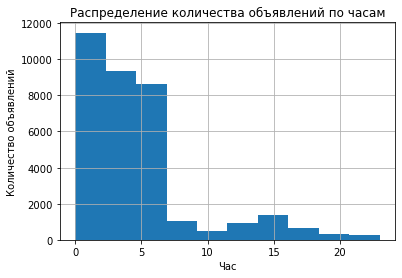

In [18]:
X["hour"].hist()
plt.xlabel('Час')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений по часам');
plt.show()

Большинство объявлений создаются с 00:00 по 6:00. 

### description

In [19]:
info_signs_nohist('description')

Тип: object
Уникальных значений: 27757
Пропущенных значений: 1037
Процент пропущенных значений:3.00%


Узнаем сколько слов используется для описания объявления

In [20]:
description = pd.DataFrame(X['description'])
description['words'] = X.description.fillna('').apply(lambda x: len(x.split()))
description.head()

,description,words
0,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,79
1,Renovated Kitchen and Bathroom!,4
2,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,43
3,Newly renovated flex 2 apartment offers the ne...,169
4,LOW FEE apartments do not come around like thi...,119


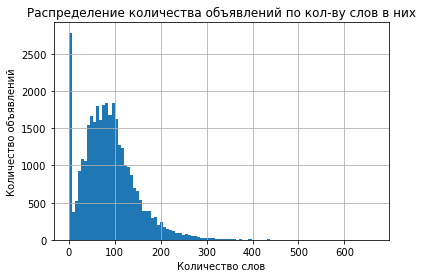

In [21]:
description['words'].hist(bins=100)
plt.xlabel('Количество слов')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений по кол-ву слов в них');
plt.show()

Много объявлений без описания с нулевым количеством слов

Добавим столбец с количеством слов в описании, наверное, когда слишком много слов пользователям лень читать до конца, а когда мало, то объявление может вызвать недоверие

In [22]:
X['description_words'] = description['words']

### display_address

In [23]:
info_signs_nohist('display_address')

Тип: object
Уникальных значений: 6998
Пропущенных значений: 88
Процент пропущенных значений:0.25%


в адресе указан адрес, для модели полезными будут координаты дома объявления

### features

In [24]:
info_signs_nohist('features')

Тип: object
Уникальных значений: 8245
Пропущенных значений: 0
Процент пропущенных значений:0.00%


In [25]:
features = []

for i in range(X.shape[0]):
   feat = X.iloc[i]['features']
   if feat.find(' * ') > 0:
     feat = feat[2:-2].split(" * ")
   else:
     feat = feat[2:-2].split("', '")
   features.extend(feat)

features = [x.lower() for x in features]
     

Вот какие признаки вынесем:

- no/reduced_fee - без платы агентству за оказание услуги, сниженная плата
- elevator - наличие лифта
- pets - разрешены ли животные
- laundry - наличие прачечной
- hardwood_floors - паркетные полы
- doorman - наличие консьержа/швейцара/домофона
- furniture - наличие какой-либо мебели/техники
- pre-war_building - довоенное ли здание
- sport - наличие рядом спортивных организаций/площадок
- park/terrace/garden - наличие балкона/сада/парка
- internet - наличие интернета
- parking - наличие парковки
- nice_view - отличный вид из окна
- repair - наличие ремонта
- subway -  метро рядом

In [26]:
from tqdm import tqdm

def adding_new_feats(data):
  for i in tqdm(range(data.shape[0])):
    feat = data.iloc[i]['features']
    feat = feat.lower()

    if feat.find('fee') >= 0 and feat.find('additional fee') < 0: #fee
      data.loc[ i ,'no/reduced_fee'] = 1
    else:
      data.loc[ i ,'no/reduced_fee'] = 0


    if feat.find('elevator') >= 0 or feat.find('elev') >= 0: #elevator
      data.loc[ i ,'elevator'] = 1
    else:
      data.loc[ i ,'elevator'] = 0


    if (feat.find('pets') >= 0 and feat.find('no pets') < 0) or \
        feat.find('cats') >= 0 or feat.find('dog') >= 0 or feat.find('animal') >=0 : #pets
      data.loc[ i ,'pets'] = 1
    else:
      data.loc[ i ,'pets'] = 0


    if feat.find('laundry') >= 0: #laundry
      data.loc[ i ,'laundry'] = 1
    else:
      data.loc[ i ,'laundry'] = 0


    if (feat.find('wood') >= 0 and feat.find('fireplace') < 0) or \
       (feat.find('oak') >= 0 and feat.find('soaking') < 0): #hardwood_floors
      data.loc[ i ,'hardwood_floors'] = 1
    else:
      data.loc[ i ,'hardwood_floors'] = 0


    if feat.find('concierge') >= 0 or feat.find('doorman') >= 0 or feat.find('intercom') >= 0: 
      data.loc[ i ,'doorman'] = 1 #doorman
    else:
      data.loc[ i ,'doorman'] = 0


    if feat.find('furnished') >= 0 or \
       feat.find('tv') >= 0 or feat.find('conditioning') >= 0 or \
       feat.find('microwave') >= 0 or feat.find('dryer') >= 0 or \
       feat.find('washer') >= 0 or feat.find('dishwasher') >= 0 or \
       feat.find('fireplace') >= 0: 
      data.loc[ i ,'furniture'] = 1 #furniture
    else:
      data.loc[ i ,'furniture'] = 0


    if feat.find('pre-war') >= 0 or feat.find('prewar') >= 0: #pre-war building
      data.loc[ i ,'pre-war_building'] = 1
    else:
      data.loc[ i ,'pre-war_building'] = 0


    if feat.find('fitness') >= 0 or feat.find('gym') >= 0 or \
       feat.find('pool') >= 0 or feat.find('court') >= 0  or \
       feat.find('basketball') >= 0  or feat.find('yoga') >= 0  or \
       feat.find('pilates') >= 0 or feat.find('dance') >= 0: 
      data.loc[ i ,'sport'] = 1 #sport
    else:
      data.loc[ i ,'sport'] = 0


    if (feat.find('park') >= 0 and feat.find('parking') < 0) or \
       feat.find('balcon') >= 0 or feat.find('terrace') >= 0 or \
       feat.find('garden') >= 0 or feat.find('patio') >= 0  or \
       feat.find('yard') >= 0 or \
       (feat.find('roof') >= 0 and feat.find('proof') < 0):
      data.loc[ i ,'park/terrace/garden'] = 1 #park/terrace/garden
    else:
      data.loc[ i ,'park/terrace/garden'] = 0


    if feat.find('internet') >= 0 or feat.find('wifi') >= 0 or feat.find('wi-fi') >= 0:
      data.loc[ i ,'internet'] = 1 #internet
    else:
      data.loc[ i ,'internet'] = 0


    if feat.find('garage') >= 0 or feat.find('parking') >= 0: #parking
      data.loc[ i ,'parking'] = 1 
    else:
      data.loc[ i ,'parking'] = 0


    if feat.find('view') >= 0: #nice view
      data.loc[ i ,'nice_view'] = 1
    else:
      data.loc[ i ,'nice_view'] = 0


    if feat.find('renovat') >= 0: #repair
      data.loc[ i ,'repair'] = 1
    else:
      data.loc[ i ,'repair'] = 0


    if feat.find('subway') >= 0 or \
       (feat.find('train') >= 0 and feat.find('training') < 0) or\
       feat.find('stop') >= 0 or feat.find('bedford') >= 0:   #bedford - название остановки
      data.loc[ i ,'subway'] = 1  #subway
    else:
      data.loc[ i ,'subway'] = 0

In [27]:
X = X.reset_index(drop=True)

Добавим признаки в выборку

In [28]:
adding_new_feats(X)

100%|███████████████████████████████████| 34546/34546 [00:21<00:00, 1620.69it/s]


In [29]:
X.isna().sum()

Id                        0
bathrooms                 0
bedrooms                  0
building_id               0
created                   0
description            1037
display_address          88
features                  0
latitude                  0
listing_id                0
longitude                 0
manager_id                0
photos                    0
price                     0
street_address            4
TARGET                    0
month_year_cnt            0
week_year_cnt             0
month                     0
day_of_week               0
hour                      0
weekday                   0
description_words         0
no/reduced_fee            0
elevator                  0
pets                      0
laundry                   0
hardwood_floors           0
doorman                   0
furniture                 0
pre-war_building          0
sport                     0
park/terrace/garden       0
internet                  0
parking                   0
nice_view           

Удалим ненужные столбцы

In [30]:
X = X.drop(columns=['features', 'description', 'display_address', 'Id' ])

### latitude longitude

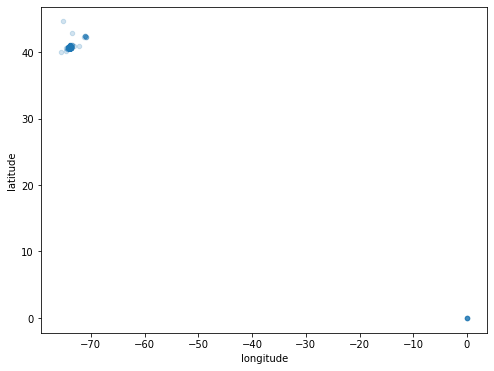

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
X.plot(kind = "scatter", x ="longitude", y ="latitude", alpha = 0.2)
plt.show()

Есть выбросы, уберем их

In [32]:
X = X.loc[(X['latitude'] < 42.0) & (X['longitude'] < -72)]
X = X.loc[(X['latitude'] > 40.2) & (X['longitude'] > -75)]

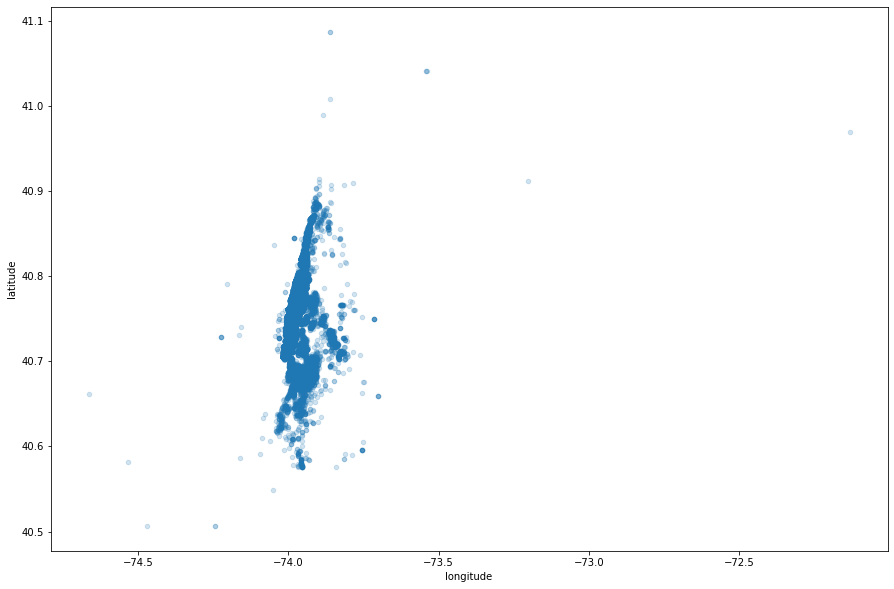

In [33]:
plt.rcParams["figure.figsize"] = (15, 10)
X.plot(kind = "scatter", x ="longitude", y ="latitude", alpha = 0.2)
plt.show()

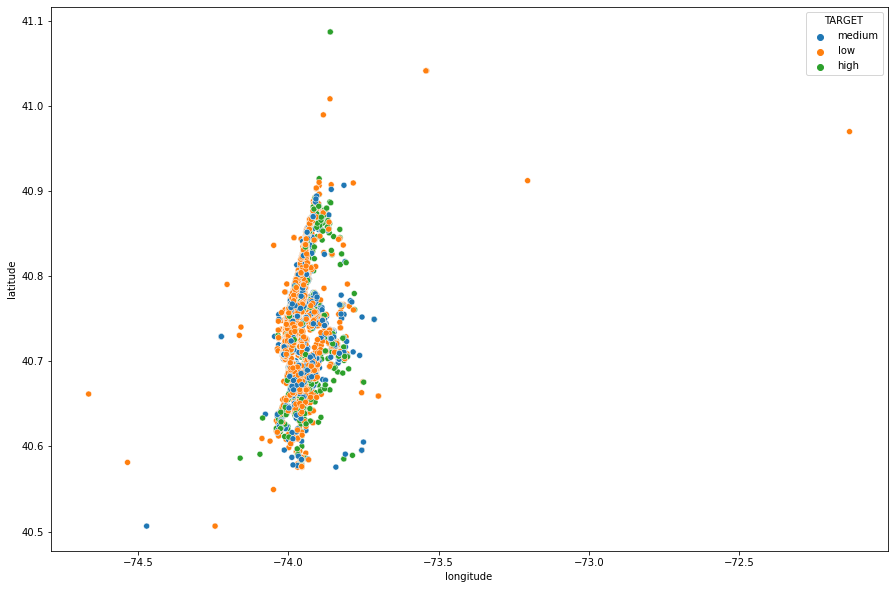

In [34]:
import seaborn as sns

sns.scatterplot(x="longitude", y="latitude", hue="TARGET", data=X);

больше всего объявлений с низкой популярностью расположены на северо-западе , а с высокой на юге, там где  Манхеттен, его координаты: (40.7834°, -73.9662), все сходится

### photos

In [35]:
def adding_number_of_photos(data):
  for i in range(data.shape[0]):
    photos = data.iloc[i]['photos'] 
    data.loc[ i ,'number_of_photos'] = len(photos[2:-2].split("', '"))
     

In [36]:
adding_number_of_photos(X)

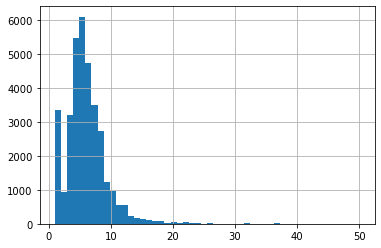

In [37]:
X['number_of_photos'].hist(bins=50, figsize=(6,4))
plt.show()

In [38]:
len(X['building_id'].value_counts())

6368

### price

Добавим признак: стоимость одной комнаты

In [39]:
def adding_cost_of_one_room(data):
  for i in range(data.shape[0]):
    rooms = np.sum(data.iloc[i]['bedrooms'] + data.iloc[i]['bathrooms'])

    if rooms == 0:
      data.loc[ i ,'cost_of_one_room'] = data.iloc[i]['price'] #cчитаем, что есть одна комната
    else:
      data.loc[ i ,'cost_of_one_room'] = data.iloc[i]['price'] / rooms

In [40]:
adding_cost_of_one_room(X)

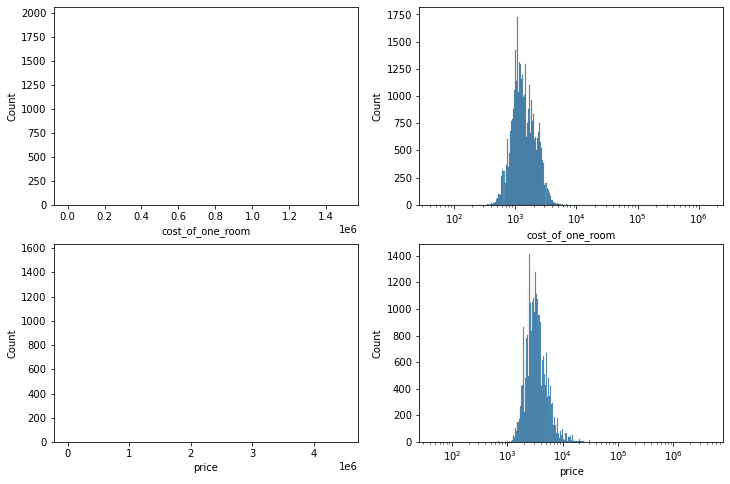

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=X, x="cost_of_one_room", ax=axs[0, 0])
sns.histplot(data=X, x="cost_of_one_room", log_scale=True, ax=axs[0, 1])
sns.histplot(data=X, x="price", ax=axs[1, 0])
sns.histplot(data=X, x="price", log_scale=True, ax=axs[1, 1])
plt.show()

Очевидно,  каждый район имеет разные цены на жилье. Значит мы **можно сгруппировать building_id по "районам" согласно их цене за комнату**

Разделим здания на:

- здания с низкой ценой
- здания c средне-низкой ценой
- здания c средней ценой
- здания c высокой ценой

In [42]:
X_old = X.copy()

In [43]:
mean = X.groupby('building_id').mean()['cost_of_one_room']
cluster = pd.concat([mean], axis = 1)
cluster['building_id'] = cluster.index
cluster.columns = ['cost_of_one_room', 'building_id']
cluster.describe()

,cost_of_one_room
count,6367.000000
mean,1514.743030
std,946.119838
min,233.333333
25%,1125.000000
50%,1420.302288
75%,1750.000000
max,54587.875000


In [44]:
cluster1 = cluster[cluster.cost_of_one_room < 875] #здания с низкой ценой
cluster2 = cluster[(cluster.cost_of_one_room >= 875) & (cluster.cost_of_one_room < 1175)] #здания c средне-низкой ценой
cluster3 = cluster[(cluster.cost_of_one_room >= 1175) & (cluster.cost_of_one_room < 1625)] #здания c средней ценой
cluster4 = cluster[cluster.cost_of_one_room >= 1625] #здания c высокой ценой
     

In [45]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'medium-low_price'
    elif x in cluster3.index:
        return 'medium_price'
    else:
        return 'high_price'

X['group'] = X.building_id.apply(get_group)

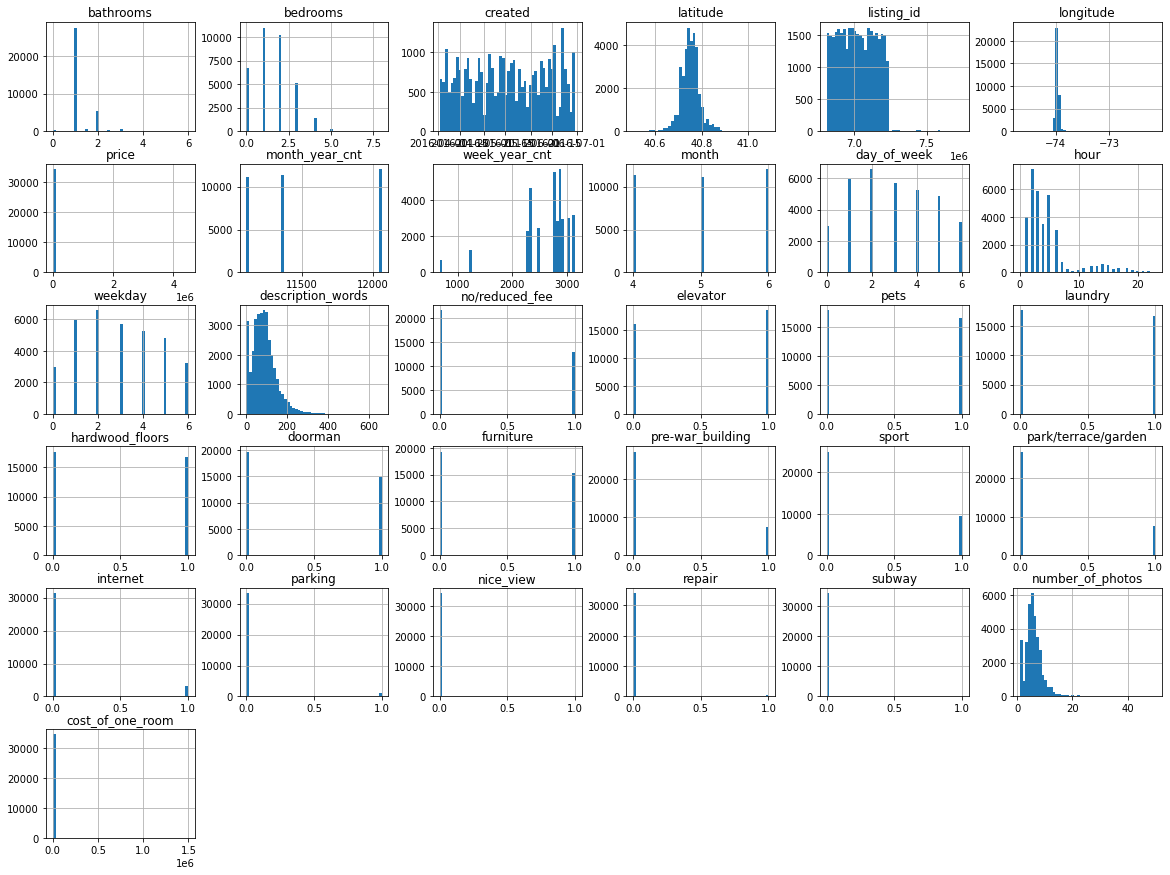

In [46]:
X.hist(bins=50, figsize=(20,15))
plt.show()

### TARGET

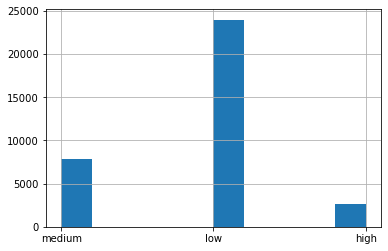

In [47]:
X['TARGET'].hist(figsize=(6,4))
plt.show()

Больше всего объявлений с низкой популярностью

In [48]:
#target_nums = {"TARGET": {"low": 1, "medium": 2, "high": 3}}
#X = X.replace(target_nums)
#X['TARGET']

## Feature engineering

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Удалим лишние признаки

In [50]:
data = X.drop(columns=['created', 'street_address', 'listing_id', 'manager_id', 'photos', 'building_id']) 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34546 entries, 0 to 34422
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            34526 non-null  float64
 1   bedrooms             34526 non-null  float64
 2   latitude             34526 non-null  float64
 3   longitude            34526 non-null  float64
 4   price                34526 non-null  float64
 5   TARGET               34526 non-null  object 
 6   month_year_cnt       34526 non-null  float64
 7   week_year_cnt        34526 non-null  float64
 8   month                34526 non-null  float64
 9   day_of_week          34526 non-null  float64
 10  hour                 34526 non-null  float64
 11  weekday              34526 non-null  float64
 12  description_words    34526 non-null  float64
 13  no/reduced_fee       34526 non-null  float64
 14  elevator             34526 non-null  float64
 15  pets                 34526 non-null 

In [52]:
data = X.drop(columns=['month_year_cnt', 'week_year_cnt', 'month', 'building_id', 'created', 'listing_id',  'manager_id', 'photos', 'street_address', 'group'])

Нормализируем данные

In [53]:
cols = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'weekday', 'hour', 'description_words', 'number_of_photos']
std_scaler = StandardScaler()
std_scaler.fit(data[cols])
std_scaled = std_scaler.transform(data[cols])

std_cols = ['std_' + i for i in cols]
data[std_cols] = std_scaled
data = data.drop(columns=cols)

In [54]:
data.head()

,TARGET,day_of_week,no/reduced_fee,elevator,pets,laundry,hardwood_floors,doorman,furniture,pre-war_building,...,cost_of_one_room,std_bathrooms,std_bedrooms,std_latitude,std_longitude,std_price,std_weekday,std_hour,std_description_words,std_number_of_photos
0,medium,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1123.750000,-0.425748,1.306853,0.349686,-0.596713,0.023040,0.046142,3.158006,-0.145888,-0.764275
1,medium,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1285.000000,-0.425748,-0.484315,-0.587783,-1.847256,-0.050116,0.046142,-0.660631,-1.427027,2.088167
2,low,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1795.000000,-0.425748,-1.379899,0.730218,-0.079781,-0.079568,-0.512841,-0.660631,-0.760835,0.091457
3,low,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1133.333333,-0.425748,0.411269,-1.076678,-1.051737,-0.018573,0.046142,0.055363,1.391479,-0.479031
4,low,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1423.750000,-0.425748,1.306853,-0.232452,-0.927921,0.068643,0.046142,0.294028,0.537386,-0.764275


## Выбор целевой метрики

нужно проклассифицировать объявления, будем смотеть на метрики: accuracy, f1-score, Precision, Recall. Метрику  accuracy можно назвать неэффективной, так как она требует выборки одинакового размера. 

Метрики Precision, Recall больше подходят нам, потому что они подходят для выборок разного размера

## Проведение экспериментов

In [55]:
data = data.dropna()

In [56]:
X = data.drop(columns=['TARGET'])
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
print(f'Train size: {X_train.shape}')
print(f'Test size: {X_test.shape}')

Train size: (25879, 26)
Test size: (8627, 26)


In [58]:
def modeling(model, X_train, y_train, X_test) -> None:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

### CatBoost

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle
from tqdm.notebook import trange, tqdm
from catboost import CatBoostClassifier
from collections import Counter

In [60]:
catboosting = CatBoostClassifier(metric_period=300)

Уберем пропуски

In [61]:
data = data.dropna()

In [62]:
modeling(catboosting, X_train, y_train, X_test)

Learning rate set to 0.093408
0:	learn: 1.0356022	total: 74.9ms	remaining: 1m 14s
300:	learn: 0.5452083	total: 1.6s	remaining: 3.71s
600:	learn: 0.4939515	total: 3.12s	remaining: 2.07s
900:	learn: 0.4525373	total: 4.66s	remaining: 512ms
999:	learn: 0.4406817	total: 5.16s	remaining: 0us
              precision    recall  f1-score   support

        high       0.55      0.26      0.35       689
         low       0.79      0.92      0.85      5947
      medium       0.47      0.31      0.38      1991

    accuracy                           0.73      8627
   macro avg       0.60      0.50      0.53      8627
weighted avg       0.70      0.73      0.70      8627



Относительно хорошо предсказываются объявления с высокой популярностью. Лучше всего предсказываются с низкой.

### Решающее дерево

In [63]:
tree = DecisionTreeClassifier(random_state=42)

In [64]:
modeling(tree, X_train, y_train, X_test)

              precision    recall  f1-score   support

        high       0.31      0.33      0.32       689
         low       0.79      0.78      0.79      5947
      medium       0.36      0.36      0.36      1991

    accuracy                           0.65      8627
   macro avg       0.49      0.49      0.49      8627
weighted avg       0.65      0.65      0.65      8627



Также хорошо предсказываются объявления с низкой популярностью. С высокой плоховато..

### Логистическая регрессия

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
modeling(LogisticRegression(random_state=42), X_train, y_train, X_test)

              precision    recall  f1-score   support

        high       0.20      0.00      0.00       689
         low       0.70      0.97      0.81      5947
      medium       0.37      0.07      0.12      1991

    accuracy                           0.68      8627
   macro avg       0.42      0.35      0.31      8627
weighted avg       0.58      0.68      0.59      8627



/Users/anastasiamyskina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логистическая регрессия хорошо предсказывает объявления с низкой популярностью.  плохо предсказывает популярные объявления.

### Бустинг

In [67]:
boost = GradientBoostingClassifier()

boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.7202967427842819

### Дерево решений

In [68]:
forest = RandomForestClassifier(n_estimators=30)

modeling(forest, X_train, y_train, X_test)

              precision    recall  f1-score   support

        high       0.54      0.20      0.30       689
         low       0.76      0.94      0.84      5947
      medium       0.47      0.22      0.30      1991

    accuracy                           0.72      8627
   macro avg       0.59      0.46      0.48      8627
weighted avg       0.67      0.72      0.67      8627



**Вывод: Можно сделать вывод, что RandomForest показал наилучший результат на нормализованных данных.**